In [1]:
!head -4 /Users/yuanxiaoyu/Desktop/PythonDataScienceHandbook/notebooks_v1/data/president_heights.csv

order,name,height(cm)
1,George Washington,189
2,John Adams,170
3,Thomas Jefferson,189


Example: What is the Average Height of US Presidents?

In [6]:
import pandas as pd
import numpy as np
data = pd.read_csv('/Users/yuanxiaoyu/Desktop/PythonDataScienceHandbook/notebooks_v1/data/president_heights.csv')

heights = np.array(data['height(cm)'])
print(heights)

[189 170 189 163 183 171 185 168 173 183 173 173 175 178 183 193 178 173
 174 183 183 168 170 178 182 180 183 178 182 188 175 179 183 193 182 183
 177 185 188 188 182 185]


In [7]:
print("Mean height:       ", heights.mean())
print("Standard deviation:", heights.std())
print("Minimum height:    ", heights.min())
print("Maximum height:    ", heights.max())

Mean height:        179.73809523809524
Standard deviation: 6.931843442745892
Minimum height:     163
Maximum height:     193


In [8]:
print(np.percentile(heights,25))

174.25


In [9]:
print(np.median(heights))

182.0


In [10]:
print(np.percentile(heights,75))

183.0


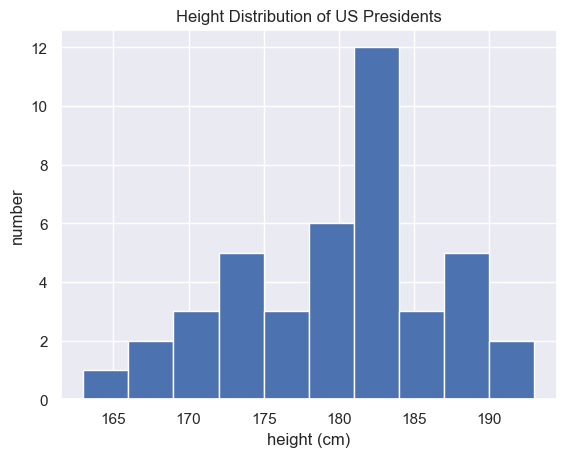

In [12]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn; seaborn.set()  # set plot style
plt.hist(heights)
plt.title('Height Distribution of US Presidents')
plt.xlabel('height (cm)')
plt.ylabel('number');

In [15]:
import numpy as np
import pandas as pd

# use pandas to extract rainfall inches as a NumPy array
rainfall = pd.read_csv('/Users/yuanxiaoyu/Desktop/PythonDataScienceHandbook/notebooks_v1/data/Seattle2014.csv')['PRCP'].values
inches = rainfall / 254.0  # 1/10mm -> inches
inches.shape

(365,)

(array([321.,  36.,   7.,   1.]),
 array([0.        , 0.45964567, 0.91929134, 1.37893701, 1.83858268]),
 <BarContainer object of 4 artists>)

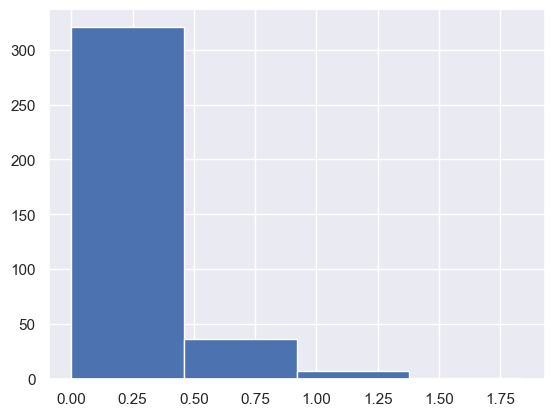

In [16]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn; seaborn.set()  # set plot styles

plt.hist(inches, 4)

In [17]:
x = np.array([1,2,3,4,5])
x <3

array([ True,  True, False, False, False])

In [18]:
x <= 3

array([ True,  True,  True, False, False])

In [27]:
np.sum((inches > 0.5) & (inches < 1))

np.int64(29)

In [28]:
np.sum((~(inches < 0.5) & (inches > 1)))
#这是错误的 应该用or 也就是｜
#于此同时， 》变成小于等于

np.int64(7)

In [29]:
np.sum(~((inches <= 0.5) | (inches >= 1)))

np.int64(29)

In [31]:
rainy = (inches > 0)

days = np.arange(365)
summer = (days >172) & (days < 272)

print("2014 年雨天的 median 降水量（英寸）：", np.median(inches[rainy]))
print("2014 年夏季的 median 降水量（英寸）：", np.median(inches[summer]))
print("2014 年夏季的最大降水量（英寸）：", np.max(inches[summer]))
print("2014 年非夏季雨天的 median 降水量（英寸）：", np.median(inches[rainy & ~summer]))

2014 年雨天的 median 降水量（英寸）： 0.19488188976377951
2014 年夏季的 median 降水量（英寸）： 0.0
2014 年夏季的最大降水量（英寸）： 0.8503937007874016
2014 年非夏季雨天的 median 降水量（英寸）： 0.20078740157480315


In [32]:
population = pd.read_csv('/Users/yuanxiaoyu/Desktop/PythonDataScienceHandbook/notebooks_v1/data/state-population.csv')

In [ ]:
datafram

In [2]:
import pandas as pd
cities = pd.read_csv('/Users/yuanxiaoyu/Desktop/PythonDataScienceHandbook/notebooks_v1/data/california_cities.csv')

In [3]:
cities.head()

,Unnamed: 0,city,latd,longd,elevation_m,elevation_ft,population_total,area_total_sq_mi,area_land_sq_mi,area_water_sq_mi,area_total_km2,area_land_km2,area_water_km2,area_water_percent
0,0,Adelanto,34.576111,-117.432778,875.0,2871.0,31765,56.027,56.009,0.018,145.107,145.062,0.046,0.03
1,1,AgouraHills,34.153333,-118.761667,281.0,922.0,20330,7.822,7.793,0.029,20.260,20.184,0.076,0.37
2,2,Alameda,37.756111,-122.274444,NaN,33.0,75467,22.960,10.611,12.349,59.465,27.482,31.983,53.79
3,3,Albany,37.886944,-122.297778,NaN,43.0,18969,5.465,1.788,3.677,14.155,4.632,9.524,67.28
4,4,Alhambra,34.081944,-118.135000,150.0,492.0,83089,7.632,7.631,0.001,19.766,19.763,0.003,0.01


In [4]:
# 提取我们感兴趣的数据
lat, lon = cities['latd'], cities['longd']
population, area = cities['population_total'], cities['area_total_km2']


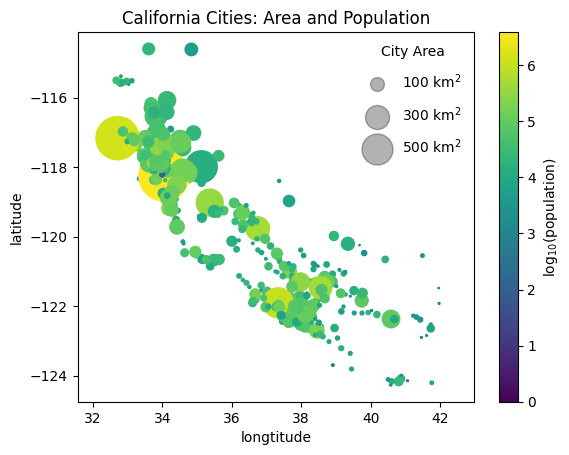

In [7]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
plt.scatter(lat, lon, c= np.log10(population),
            cmap='viridis',
            s=area)
#c 代表每个点的颜色值，这里使用了 population 的对数（以10为底）作为颜色。
#s 表示每个点的大小（面积）。
plt.xlabel("longtitude")
plt.ylabel('latitude')
plt.colorbar(label='log$_{10}$(population)')
plt.axis('equal')
for area in [100, 300, 500]:
    plt.scatter([], [], c='k', alpha=0.3, s=area,
                label=str(area) + ' km$^2$')
#虽然这段代码不在图中绘制任何真实数据点，
# 但它会在图例（legend）中添加代表不同面积大小的圆点说明
plt.legend(scatterpoints=1, frameon=False, labelspacing=1, title='City Area')

plt.title('California Cities: Area and Population');